<a href="https://colab.research.google.com/github/gennadygorin/seq-cme-technoise/blob/dev/gg220406_refactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov chains for length bias quantification in scRNA-seq: a Colab demonstration

slowly but surely


In [1]:

# import collections
import numpy as np
# import sklearn
# import warnings
# import matplotlib.py/plot as plt
# import csv

In [2]:
dataset_names = ['heart_10k_v3'] 
loom_filepaths = ['/home/ggorin/count_data/loom_10x_kb/'+x+'.loom' for x in dataset_names] 

transcriptome_filepath = './polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=['spliced','unspliced','gene_name','barcode']

In [3]:
dataset_names

['heart_10k_v3']

In [4]:
from preprocess import *

In [5]:
datetime.now(pytz.timezone('US/Pacific')).strftime("%y%m%d")

'220525'

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Dataset: heart_10k_v3
INFO:root:7462 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:8408 genes retained after expression filter.
INFO:root:Gene set size: 8408
INFO:root:2000 genes selected.


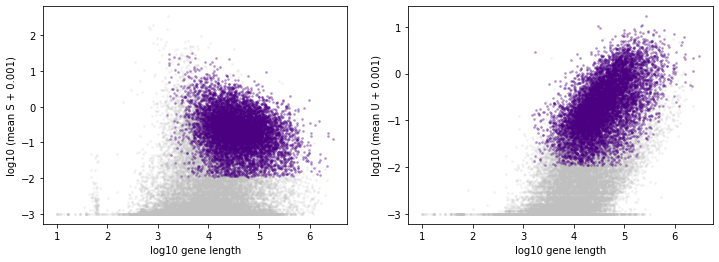

In [19]:
dir_string,dataset_strings = construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='modelcomp',batch_id=1,\
                                             n_genes=2000)

In [20]:

# dir_string = './fits/gg_220430_020_nuc_delay_2'
# dataset_strings = [dir_string+'/'+x for x in dataset_names]
# dir_string = 

In [21]:
# n_datasets = len(dataset_strings)

In [22]:
from extract_data import extract_data

In [23]:
import cme_toolbox
from cme_toolbox import CMEModel
import inference
from inference import InferenceParameters, GradientInference
import analysis 
from analysis import *

# import importlib

# importlib.reload(inference)
# importlib.reload(cme_toolbox)
# importlib.reload(analysis)

search_data_arr = []


In [23]:
CMEModel.get_MoM??

In [24]:
import logging, sys

logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.INFO)

In [25]:
dir_string = './fits/gg_220525_021_modelcomp_1'

In [26]:

models = ('Bursty','Constitutive','Extrinsic','CIR')
# search_data = load_search_data(dataset_strings[0]+'/raw.sd')

In [27]:
models

('Bursty', 'Constitutive', 'Extrinsic', 'CIR')

In [28]:
dataset_strings = ['./fits/gg_220525_021_modelcomp_1/heart_10k_v3']


Bursty
INFO:root:Global inference parameters stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_15x16/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: heart_10k_v3
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220525_021_modelcomp_1/genes.csv.
INFO:root:Search data stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/raw.sd.
INFO:root:Starting parallelized grid scan.
INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_15x16/analysis_figures created.
INFO:root:Runtime: 1961.1 seconds.
Constitutive
INFO:root:Directory ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Constitutive_Poisson_15x16 created.
INFO:root:Global inference parameters stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Constitutive_Poisson_15x16/parameters.pr.
INFO:root

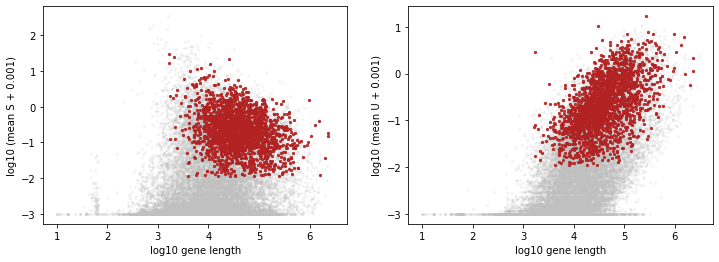

In [29]:
result_strings = []
lb = [[-1.0, -1.8, -1.8 ],
      [-1.0, -1.0 ],
      [-1.0, -1.8, -1.8 ],
      [-1.0, -1.8, -1.8 ]]
ub = [[4.2, 2.5, 3.5],
      [3.5, 3.5],
      [4.2, 2.5, 3.5],
      [4.2, 2.5, 3.5]]
grid = [15,16]

for j in range(len(models)):
    fitmodel = CMEModel(models[j],'Poisson')
    print(models[j])
    inference_parameters = InferenceParameters(lb[j],ub[j],[-8, -3],[-5, 0],grid,\
                dataset_strings[0],fitmodel,use_lengths = True,
                gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
    if j==0:
        search_data = extract_data(loom_filepaths[0], transcriptome_filepath, dataset_names[0],
                            dataset_strings[0], dir_string, dataset_attr_names=attribute_names)
    else:
        search_data = load_search_data(dataset_strings[0]+'/raw.sd')
    full_result_string = inference_parameters.fit_all_grid_points(50,search_data)
    result_strings.append(full_result_string)

In [30]:
result_strings

['./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_15x16/grid_scan_results.res',
 './fits/gg_220525_021_modelcomp_1/heart_10k_v3/Constitutive_Poisson_15x16/grid_scan_results.res',
 './fits/gg_220525_021_modelcomp_1/heart_10k_v3/Extrinsic_Poisson_15x16/grid_scan_results.res',
 './fits/gg_220525_021_modelcomp_1/heart_10k_v3/CIR_Poisson_15x16/grid_scan_results.res']

In [ ]:
# result_strings = ['./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_5x6/grid_scan_results.res']# + result_strings

In [19]:
import importlib
# importlib.reload(analysis)


In [20]:
import inference
import analysis
importlib.reload(inference)
importlib.reload(analysis)

<module 'analysis' from '/home/ggorin/projects/seq-cme-technoise/analysis.py'>

In [21]:
# InferenceParameters??

In [22]:
importlib.reload(cme_toolbox)

<module 'cme_toolbox' from '/home/ggorin/projects/seq-cme-technoise/cme_toolbox.py'>

In [ ]:
# import cme_toolbox



In [ ]:
dataset_strings

In [66]:
import analysis
from analysis import *
# import inference
# from inference import *

In [ ]:
# res_strings = ['./gg_220410_020_batch_1/pbmc_1k_fbc/Bursty_Poisson_10x10/grid_scan_results.res',\
#                './gg_220410_020_batch_1/pbmc_1k_v3/Bursty_Poisson_10x10/grid_scan_results.res']
# search_data_strings = ['./gg_220410_020_batch_1/pbmc_1k_fbc/raw.sd',\
#                './gg_220410_020_batch_1/pbmc_1k_v3/raw.sd']
# dir_string = './gg_220410_020_batch_1'

In [ ]:
# def load_search_data(search_data_string):
#     try:
#         with open(search_data_string,'rb') as sdfs:
#             sd = pickle.load(sdfs)
#         log.info('Search data loaded from {}.'.format(search_data_string))
#         return sd
#     except:
#         log.error('Search data could not be loaded from {}.'.format(search_data_string))


In [ ]:
# dir_string = './fits/gg_220422_020_allen_celltypes_1'

In [ ]:
sd_strings = [x+'/raw.sd' for x in dataset_strings]
search_data_arr = [load_search_data(x) for x in sd_strings]


In [ ]:
# result_strings = ['./fits/gg_220422_020_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_15x15/grid_scan_results.res']
# n_datasets = len(result_strings)

In [ ]:
# result_strings_upd = [x[:-4]+'_upd.res' for x in result_strings]

In [ ]:
# sr_arr = []
sd_arr = search_data_arr

# for j in range(n_datasets):
#     sr = load_search_results(result_strings_upd[j])
#     sr_arr.append(sr)

In [25]:
n_models = len(models)

In [ ]:
search_data_arr

In [ ]:
result_strings

(-6.071428571428571, -0.5999999999999996)
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_15x16/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_15x16/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 303 genes out of 2000. Runtime: 2.2 seconds.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_15x16/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Bursty_Poisson_15x16/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.07, -0.60.
INFO:root:Chi-square computation complete. Rejected 303 genes out of 2000. Runtime: 2.2 seconds.
INFO:root:New optimum: -6.07, -0.60.
INFO:root:Chi-square computation complete. Rejected 303 genes out of 2000. Runtime: 2.3 seconds.
INFO:root:New optimum: -6.07, -0.60.
INFO:root:Chi-square computation complete. Rejected 303 genes out of 2000. Runtime: 2.1 seconds.
INFO:root:New optimum: -6.07, -0.60.
INFO:root:Chi-square computation complete. Rejected 303 genes out of 2000. Runtime: 2.1 seconds.
INFO:root:New optimum: -6.07, -0.60.
INFO:root:Chi-square computation complete. Rejected 303 gen

/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 1128 genes out of 2000. Runtime: 0.7 seconds.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Constitutive_Poisson_15x16/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Constitutive_Poisson_15x16/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -5.00, 0.00.
INFO:root:Chi-square computation complete. Rejected 1128 genes out of 2000. Runtime: 0.7 seconds.
INFO:root:New optimum: -5.00, 0.00.
INFO:root:Chi-square computation complete. Rejected 1128 genes out of 2000. Runtime: 0.7 seconds.
INFO:root:New optimum: -5.00, 0.00.
INFO:root:Chi-square computation complete. Rejected 1128 genes out of 2000. Runtime: 0.7 seconds.
INFO:root:New optimum: -5.00, 0.00.
INFO:root:Chi-square computation complete. Rejected 1128 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.00, 0.00.
INFO:root:Chi-square computation complete. Reje

/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)
/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)


(-5.428571428571429, -0.3999999999999999)
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Extrinsic_Poisson_15x16/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Extrinsic_Poisson_15x16/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 411 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Extrinsic_Poisson_15x16/analysis_figures/subsampling.png.


/home/ggorin/projects/seq-cme-technoise/inference.py:581: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1,ax1=plt.subplots(nrows=1,ncols=Nsamp,figsize=figsize)


INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Extrinsic_Poisson_15x16/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -5.43, -0.40.
INFO:root:Chi-square computation complete. Rejected 411 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.43, -0.40.
INFO:root:Chi-square computation complete. Rejected 411 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.43, -0.40.
INFO:root:Chi-square computation complete. Rejected 411 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.43, -0.40.
INFO:root:Chi-square computation complete. Rejected 411 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.43, -0.40.
INFO:root:Chi-square computation complete. Rejected 411 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.43, -0.40.
INFO:root:Chi-square computation complete. Rejected 411 genes out of 2000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.43, -0.40.
INFO:root:Chi

/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/Extrinsic_Poisson_15x16/analysis_figures/parameter_marginals.png.
(-5.642857142857142, -0.3999999999999999)
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/CIR_Poisson_15x16/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/CIR_Poisson_15x16/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 83 genes out of 2000. Runtime: 2.9 seconds.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/CIR_Poisson_15x16/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220525_021_modelcomp_1/heart_10k_v3/CIR_Poisson_15x16/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -5.64, -0.40.
INFO:root:Chi-square computation complete. Rejected 83 genes out of 2000. Runtime: 2.8 seconds.
INFO:root:New optimum: -5.64, -0.40.
INFO:root:Chi-square computation complete. Rejected 83 genes out of 2000. Runtime: 2.8 seconds.
INFO:root:New optimum: -5.64, -0.40.
INFO:root:Chi-square computation complete. Rejected 83 genes out of 2000. Runtime: 2.8 seconds.
INFO:root:New optimum: -5.64, -0.40.
INFO:root:Chi-square computation complete. Rejected 83 genes out of 2000. Runtime: 2.9 seconds.
INFO:root:New optimum: -5.64, -0.40.
INFO:root:Chi-square computation complete. Rejected 83 genes out of 20

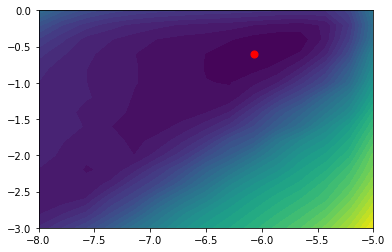

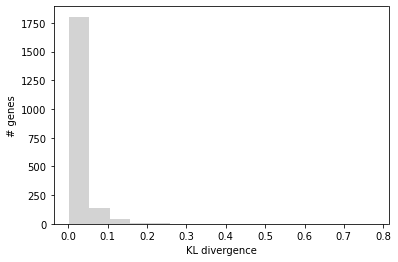

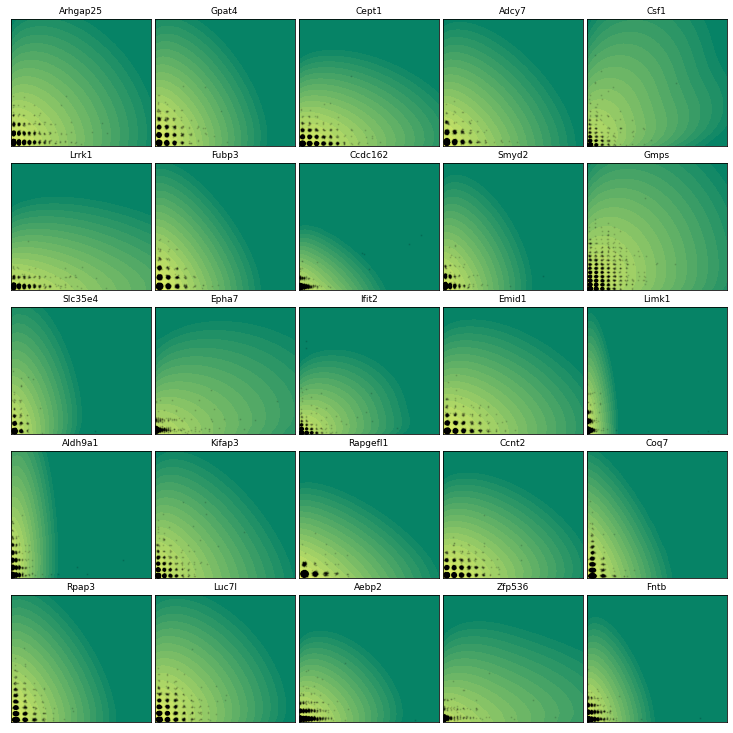

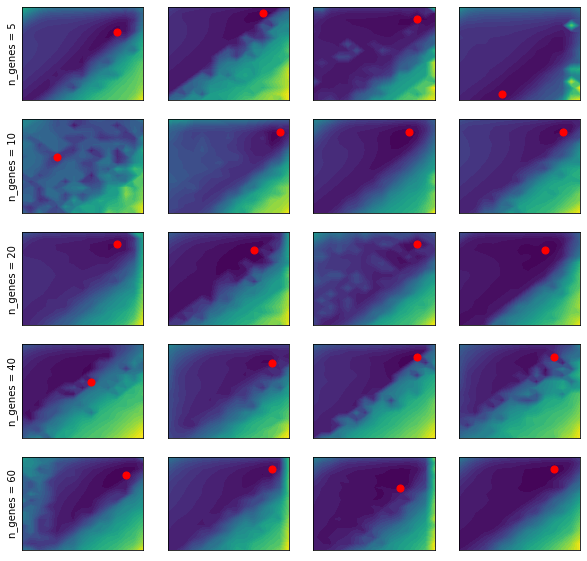

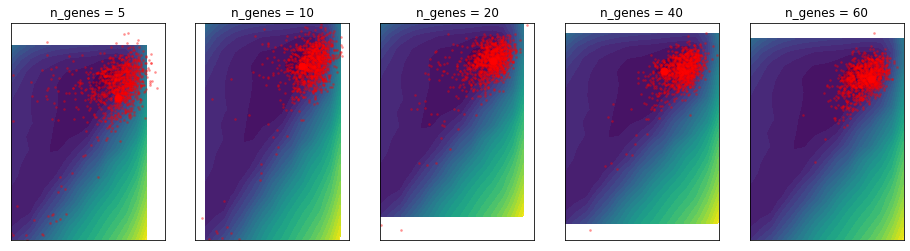

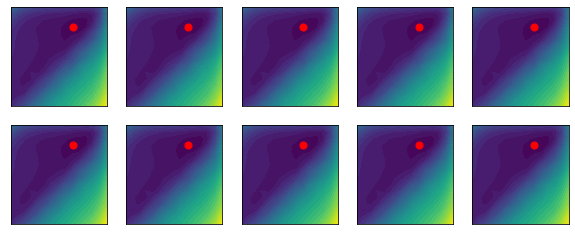

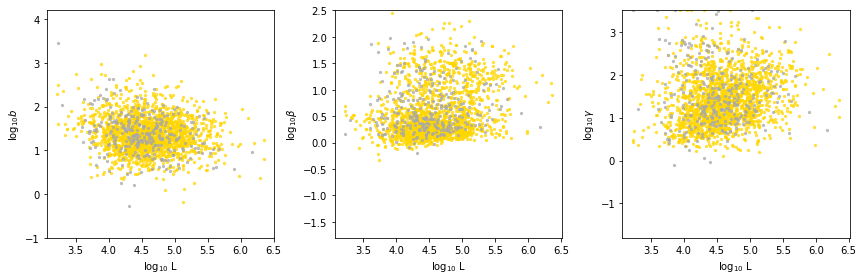

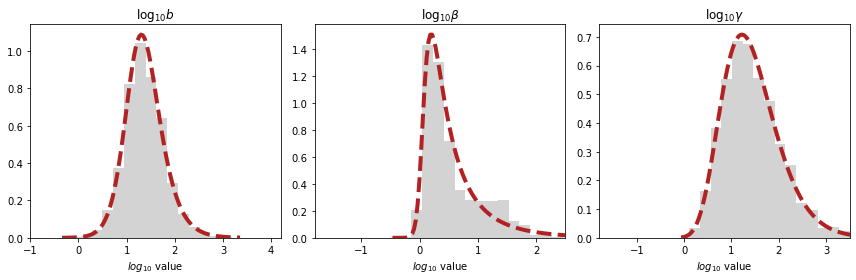

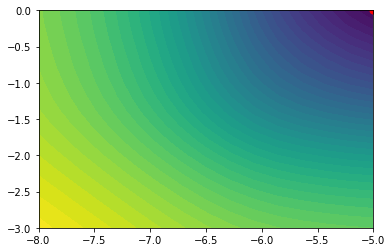

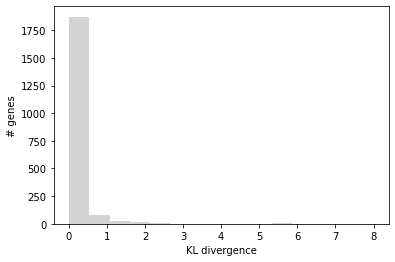

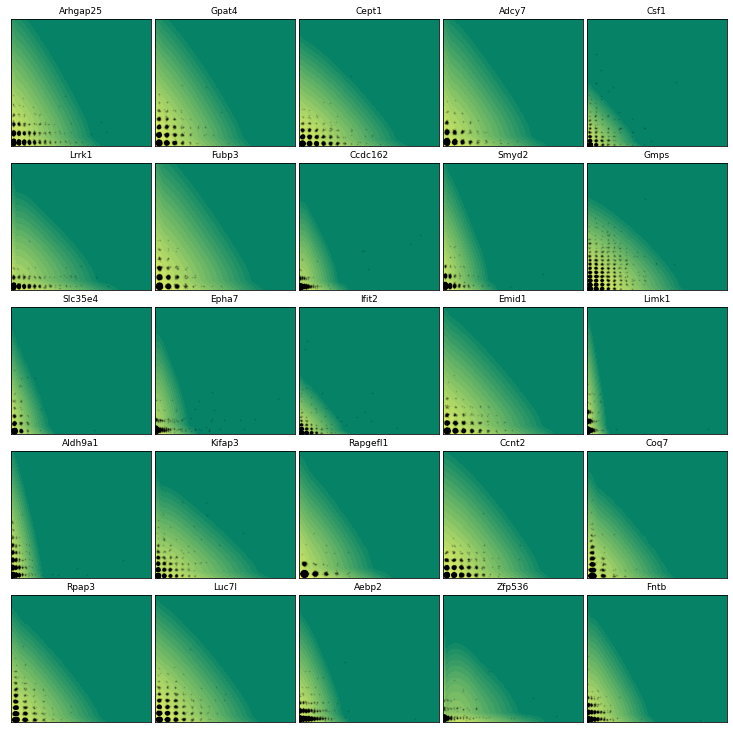

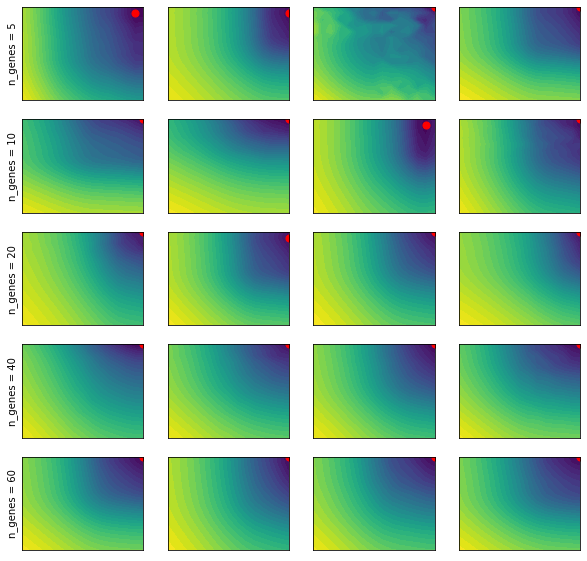

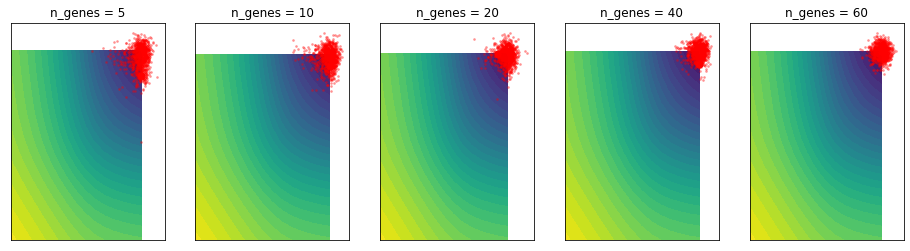

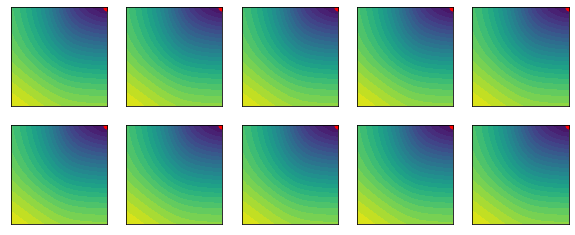

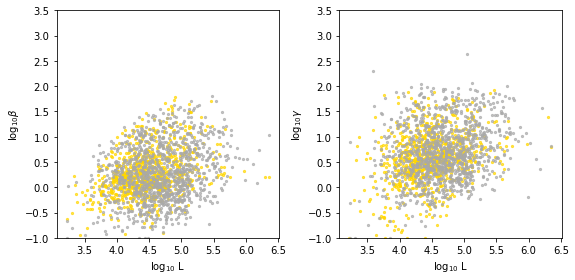

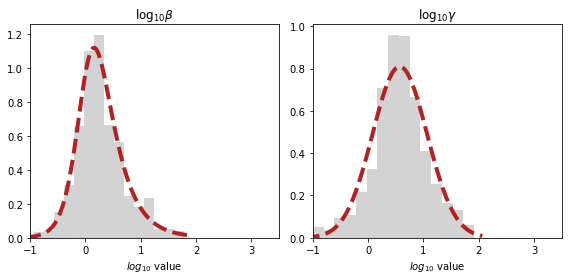

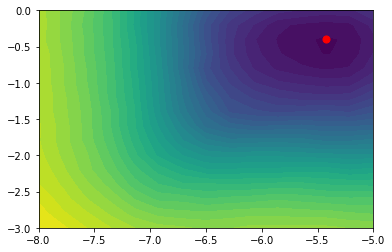

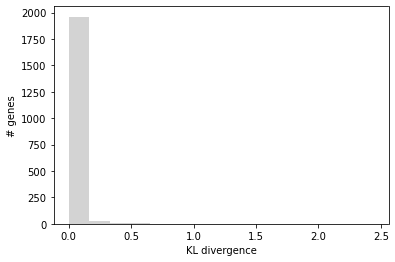

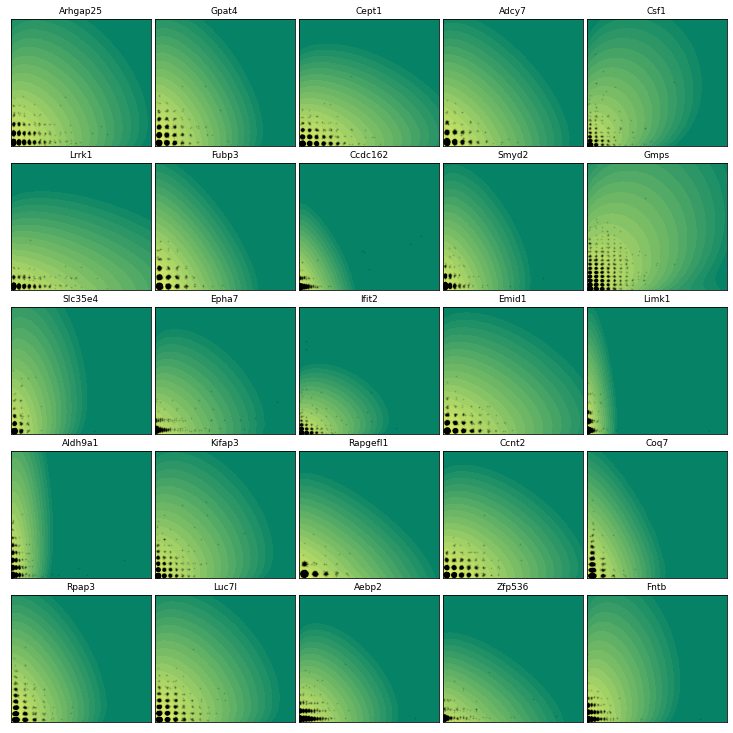

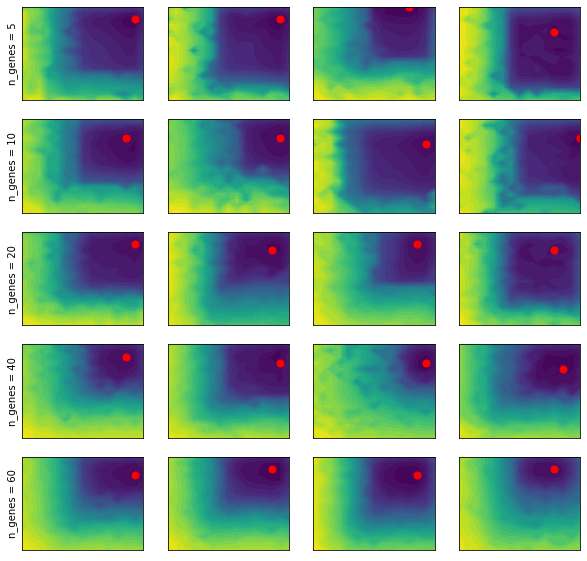

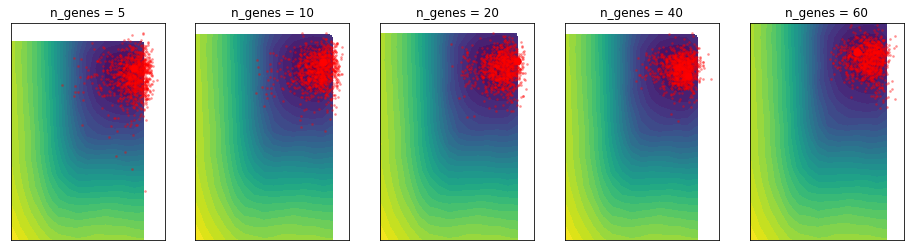

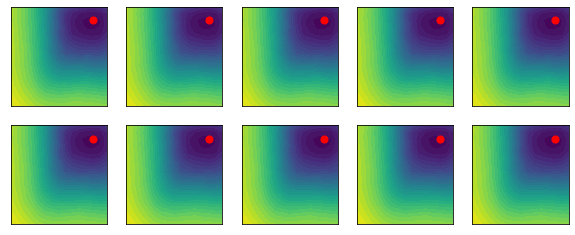

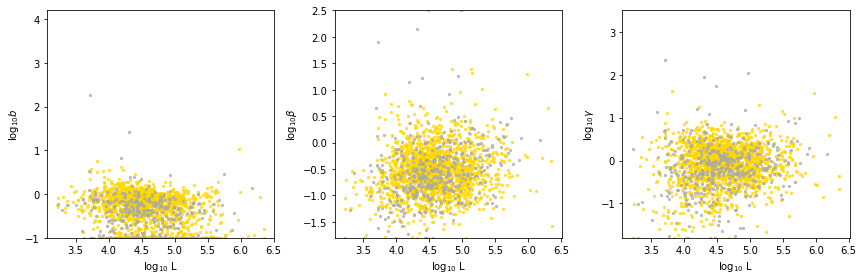

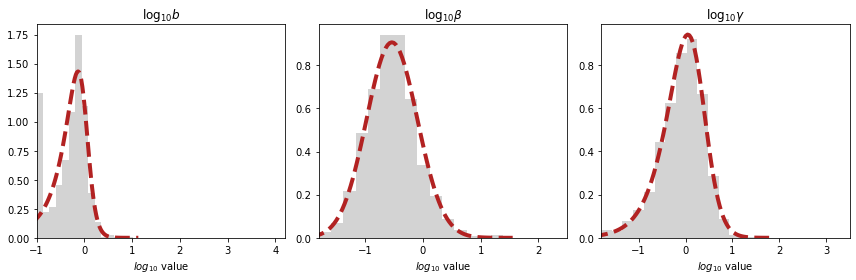

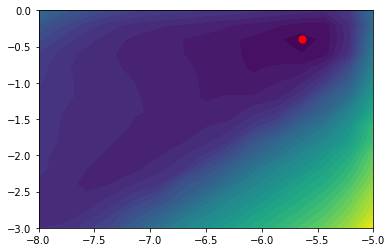

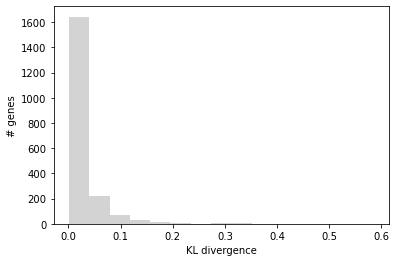

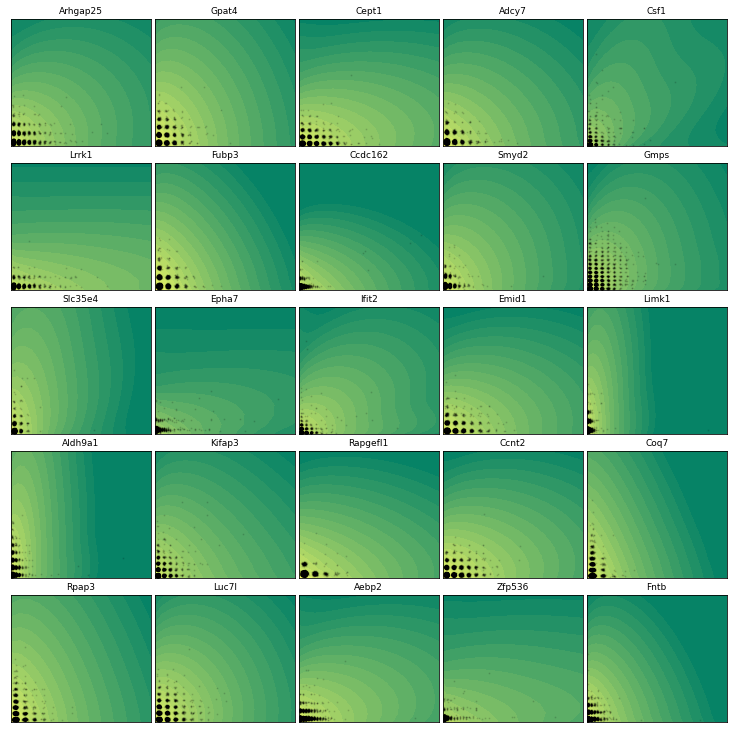

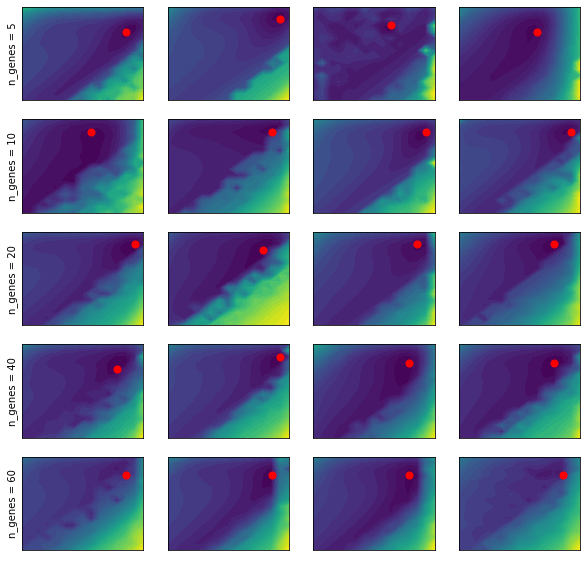

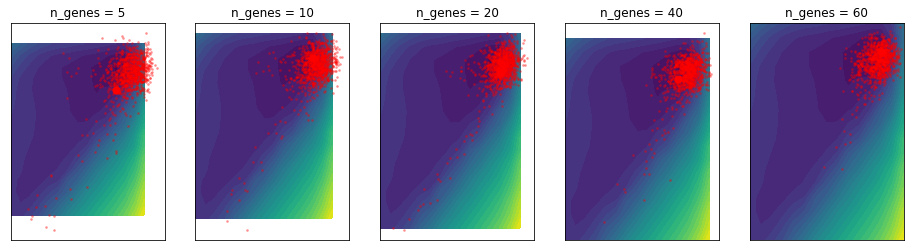

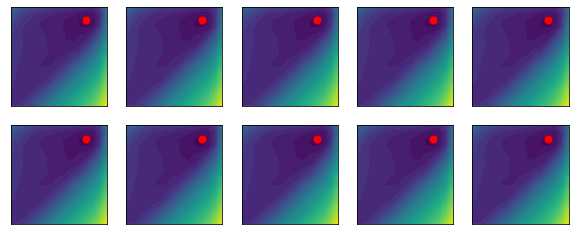

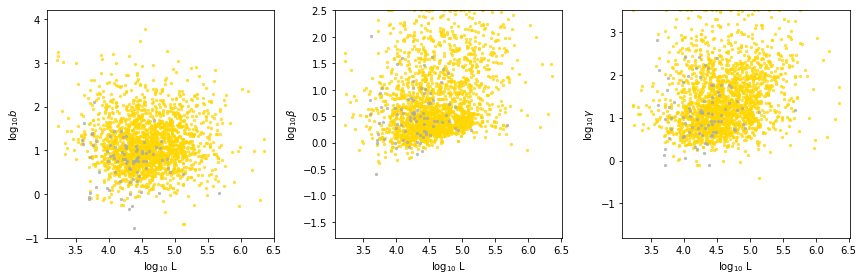

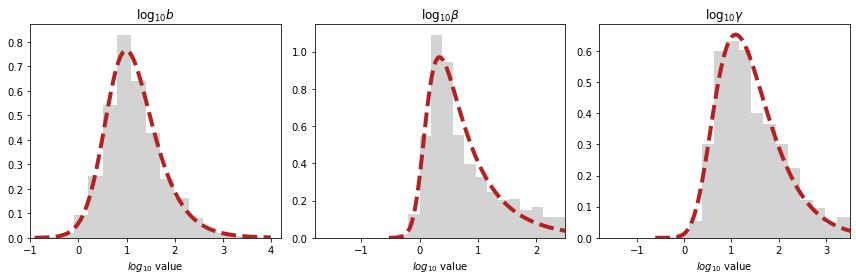

In [31]:
sr_arr = []


for j in range(len(models)):
    sr = load_search_results(result_strings[j])
    sd = search_data
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()
    sr.plot_landscape(ax1)

    print(sr.samp_optimum)
    
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    sr.plot_gene_distributions(sd,marg='joint')
    
    _=sr.chisquare_testing(sd)
    
#     #these do not make sense to do for a single "virtual" grid point
    sr.resample_opt_viz()
    sr.resample_opt_mc_viz()
    sr.chisq_best_param_correction(sd,viz=True) 
# #     print(sr.samp_optimum_ind)

# #     sr.compute_sigma(sd)
    sr.plot_param_L_dep(plot_errorbars=False,plot_fit=True)
#     sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    sr.update_on_disk()
    sr_arr.append(sr)


In [32]:
w = get_AIC_weights(sr_arr,search_data)

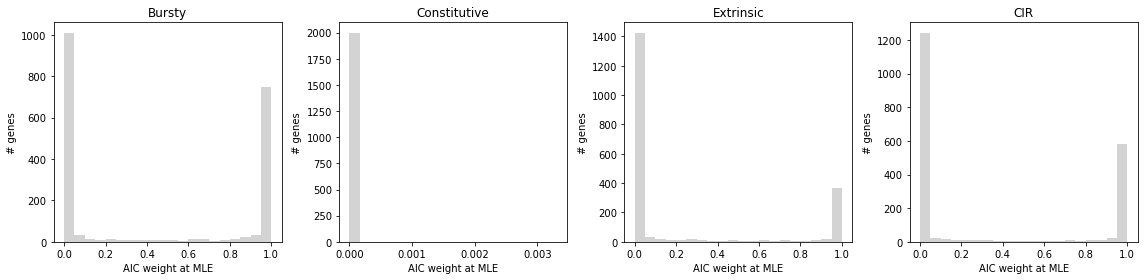

In [33]:
plot_AIC_weights(w,models)

In [30]:
model_logL = [sr_arr[j].get_logL(search_data) for j in range(n_models)]

In [34]:
AIC = []
for j in range(n_models):
    if j != 1:
        AIC += [2*3-2*model_logL[j]]
    else:
        AIC += [2*2-2*model_logL[j]] 
        

In [35]:
AIC = np.asarray(AIC)

In [56]:
wmodel.shape[0]

4

In [39]:
min_AIC = AIC.min(0)
normalization = np.exp(-(AIC - min_AIC)/2).sum(0)
wmodel = np.exp(-(AIC - min_AIC)/2) / normalization


(array([202.,   2.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,   3.,   1.,
          0.,   2.,   2.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,   3.,
          3.,   1.,   1.,   2.,   3.,   1.,   1., 264.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

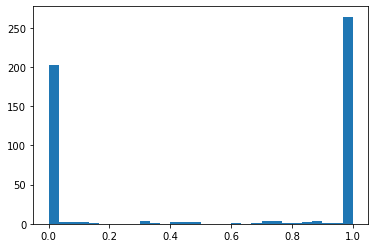

In [54]:
plt.hist(wmodel[0],30)

In [ ]:
fitparams

In [ ]:
def plot_residuals(sr1,sr2,dir_string,gene_filter = None,\
                     plot_errorbars=False,\
                     figsize=(12,4),c=2.576,\
                     axis_search_bounds = True,
                     distinguish_rej = True,
                     plot_identity = True,
                     meta = '12',
                     xlabel = 'dataset 1',
                     ylabel = 'dataset 2',
                     viz=True):
    if viz:
        fig1,ax1=plt.subplots(nrows=1,ncols=3,figsize=figsize)

    if gene_filter is None:
        gene_filter = np.ones(sr1.phys_optimum.shape[0],dtype=bool)
        gene_filter_rej = ~gene_filter
    else:
        if gene_filter.dtype != np.bool:
            gf_temp = np.zeros(sr1.phys_optimum.shape[0],dtype=bool)
            gf_temp[gene_filter] = True
            gene_filter = gf_temp
            gene_filter_rej = np.zeros(sr1.phys_optimum.shape[0],dtype=bool) #something like this...
        else:
            gene_filter = np.copy(gene_filter)
            gene_filter_rej = np.zeros(gene_filter.shape,dtype=bool)

    if distinguish_rej: #default
        if hasattr(sr1,'rejected_genes') and hasattr(sr2,'rejected_genes'):
            if sr1.rejection_index != sr1.samp_optimum_ind:
                log.warning('Sampling parameter value is inconsistent.')
                distinguish_rej = False
            elif sr2.rejection_index != sr2.samp_optimum_ind:
                log.warning('Sampling parameter value is inconsistent.')
                distinguish_rej = False
            else: #if everything is ready
                gene_filter_rej =  np.logical_and(gene_filter,np.logical_or(sr1.rejected_genes,sr2.rejected_genes))
                gene_filter = np.logical_and(gene_filter,~sr1.rejected_genes,~sr2.rejected_genes)
                acc_point_aesth = ('accepted_gene_color','accepted_gene_alpha','accepted_gene_ms')
                rej_point_aesth = ('rejected_gene_color','rejected_gene_alpha','rejected_gene_ms')
        else:
            log.info('Gene rejection needs to be precomputed to distinguish rejected points.')
            distinguish_rej = False

    if not distinguish_rej: #don't distinguish
        acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
#         acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
        log.info('Falling back on generic marker properties.') 
    
    gn = []
    gf_ = []
    for i in range(3):
        xl = [sr1.sp.phys_lb[i],sr1.sp.phys_ub[i]]
        if viz:
            gf = diffexp_fpe(xl,sr1.phys_optimum[gene_filter,i],sr2.phys_optimum[gene_filter,i],\
                             ax1=ax1[i],s1=sr1.sigma[gene_filter,i],s2=sr2.sigma[gene_filter,i],nit=10,viz=viz)
        else:
            gf = diffexp_fpe(xl,sr1.phys_optimum[gene_filter,i],sr2.phys_optimum[gene_filter,i],\
                             s1=sr1.sigma[gene_filter,i],s2=sr2.sigma[gene_filter,i],nit=10,viz=viz)
        gn.append(sr1.gene_names[~gf])
        gf_.append(gf)
    if viz:
        fig1.tight_layout()
    return  gn, gf_


In [ ]:
from scipy import odr
def idoffset(B, x):
    return x + B[0]

def diffexp_fpe(xl,m1,m2,ax1=None,s1=None,s2=None,nit=1,pval = 0.005,viz=True):
    
    gf = np.ones(len(m1),dtype=bool)
    x = np.linspace(xl[0], xl[1], 100)
    fitlaw = scipy.stats.norm
    
    for j in range(nit):
        d = odr.Data(m1[gf],m2[gf])
        idoffsmod = scipy.odr.Model(idoffset)

        myodr = odr.ODR(d, idoffsmod, beta0=[0])
        out = myodr.run()
        resid = m2-m1-out.beta
        fitparams = fitlaw.fit(resid[gf])
        p = fitlaw.pdf(x, *fitparams)
        if j==0 and viz:
            ax1.plot(x, p, '--', \
                        linewidth=1,\
                        color='r')

        z = (resid-fitparams[0])/fitparams[1]
        gf = np.logical_not((scipy.stats.norm.sf(np.abs(z))*2)<(pval))
        if j==(nit-1) and viz:
            n,bins = np.histogram(resid,200,density=True)
            binc = np.diff(bins)/2 + bins[:-1]
            ax1.bar(binc,n,width=np.diff(bins),color = 'lightgrey',align='center')
            ax1.plot(x, p, '-', \
                        linewidth=2,\
                        color='darkred')
            y_,_ = np.histogram(resid[~gf],bins=bins,density=True)
            y_ *=(~gf).mean()
            ax1.bar(binc,y_,width=np.diff(bins),color = 'teal',align='center')
    return gf


In [ ]:
sd_arr

In [ ]:
np.asarray(None) is None

In [ ]:
def compare_gene_distributions(sr,sd,sz = (1,3),figsize = (12,5),\
               marg='joint',logscale=None,title=True,\
               genes_to_plot = None,fc = ('lightsteelblue','lightcoral'),lc=('royalblue','red')):
    if logscale is None:
        if marg=='joint':
            logscale = True
        else:
            logscale = False
#     print(logscale)
    (nrows,ncols)=sz
    
    fig1,ax1=plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)

    nax = np.prod(sz)
    if genes_to_plot is None:
        genes_to_plot = np.arange(nax)
    
    genes_to_plot = np.asarray(genes_to_plot)
#     print(genes_to_plot.dtype)
#     if len(genes_to_plot)==1:
#         genes_to_plot = np.arange(genes_to_plot)
    if genes_to_plot.dtype == bool:
        gtp_temp = np.arange(sr[0].n_genes)
        genes_to_plot = gtp_temp[genes_to_plot]
#     print(genes_to_plot)
    
    number_of_genes_to_plot = len(genes_to_plot)
    if number_of_genes_to_plot > sr[0].n_genes:
        number_of_genes_to_plot = sr[0].n_genes
        genes_to_plot = genes_to_plot[:sr[0].n_genes]
    if number_of_genes_to_plot>nax:
        number_of_genes_to_plot = nax
        genes_to_plot = genes_to_plot[:nax]
#     print(genes_to_plot)
    
    j_ = 0
    for i_ in genes_to_plot:
        axloc = np.unravel_index(j_,sz) if (sz[0]>1 and sz[1]>1) else j_

        for j in range(len(sr)):
            lm = [sd[j].M[i_],sd[j].N[i_]]
            if marg == 'mature':
                lm[0]=1
            if marg == 'nascent':
                lm[1]=1
            samp = None if (sr[j].model.seq_model == 'None') else sr[j].regressor_optimum[i_]
            Pa = np.squeeze(sr[j].model.eval_model_pss(sr[j].phys_optimum[i_],lm,samp))

            if marg=='joint':
                log.error('Potentially implement this later...')
                raise ValueError('Cannot compare two 2D histograms!')
            else:
                plot_hist_and_fit(ax1[axloc],sd[j],i_,Pa,marg,facealpha=0.5,facecolor=fc[j],fitcolor=lc[j])
        if logscale:
#                 print(logscale)
            ax1[axloc].set_yscale('log')
        if title: #add a "rejected" thing
            ax1[axloc].set_title(sd[0].gene_names[i_],fontdict={'fontsize': 9})

        ax1[axloc].set_xticks([])
        ax1[axloc].set_yticks([])

        j_+=1
    fig1.tight_layout(pad=0.02)

def plot_hist_and_fit(ax1,sd,i_,Pa,marg='nascent',\
                      facecolor=aesthetics['hist_face_color'],\
                      fitcolor=aesthetics['hist_fit_color'],facealpha=1):
    if marg=='nascent':
        ax1.hist(sd.U[i_],
                        bins=np.arange(sd.M[i_])-0.5,\
                        density=True,\
                        color=facecolor,alpha=facealpha)
        ax1.plot(np.arange(sd.M[i_]),Pa,\
                        color=fitcolor)
#         ax1.set_xlim([-0.5,sd.U[i_].max()+2.5])
    elif marg =='mature':
        ax1.hist(sd.S[i_],
                        bins=np.arange(sd.N[i_])-0.5,\
                        density=True,\
                        color=facecolor,alpha=facealpha)
        ax1.plot(np.arange(sd.N[i_]),Pa,\
                        color=fitcolor)
#         ax1.set_xlim([-0.5,sd.S[i_].max()+2.5])
        
            


In [ ]:
# gtp=np.zeros(search_data.n_genes,dtype=bool)
# gtp[20:29] = True

In [ ]:
for i in range(4):
    m1 = np.log10([x['S_mean'] for x in sd_arr[i*2-1].moments])
    m2 = np.log10([x['S_mean'] for x in sd_arr[i*2].moments])
    xl = [min(m1),max(m1)]
    fig1,ax1 = plt.subplots()
    gf_naive = diffexp_fpe(xl,m1,m2,s1=None,s2=None,ax1=ax1,nit=10)
    gn_naive = sd_arr[i*2-1].gene_names[~gf_naive]
    compare_gene_distributions((sr_arr[i*2-1],sr_arr[i*2]),(sd_arr[i*2-1],sd_arr[i*2]),marg='mature',\
                              logscale=False,sz = (1,5),figsize=(10,3),genes_to_plot = ~gf_naive)
#                          distinguish_rej=False,plot_errorbars=False,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
#                          ylabel = dataset_names[i*2])

In [ ]:
for i in range(1):
    gn_params,gf_params = plot_residuals(sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
                         distinguish_rej=False,plot_errorbars=False,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
                         ylabel = dataset_names[i*2],viz=True)
    
    m1 = np.log10([x['S_mean'] for x in sd_arr[i*2-1].moments])
    m2 = np.log10([x['S_mean'] for x in sd_arr[i*2].moments])
    xl = [min(m1),max(m1)]
    fig1,ax1 = plt.subplots()
    gf_naive = diffexp_fpe(xl,m1,m2,s1=None,s2=None,ax1=ax1,nit=10,viz=True,pval=0.1)
    gn_naive = sd_arr[i*2-1].gene_names[~gf_naive]
#     compare_gene_distributions((sr_arr[i*2-1],sr_arr[i*2]),(sd_arr[i*2-1],sd_arr[i*2]),marg='mature',\
#                               logscale=False,sz = (1,5),figsize=(10,3),genes_to_plot = ~gf_naive)

    gtp =  np.logical_and(~gf_params[0],np.abs(m1-m2) < 0.1)
#     gtp =  np.logical_and(~gf_params[0],gf_naive)
    plt.figure()
    print(m1[gtp])
    print(m2[gtp])
    plt.scatter(m1[gtp],m2[gtp],c='k',s=5)
    plt.plot(xl,xl,'r--')
    compare_gene_distributions((sr_arr[i*2-1],sr_arr[i*2]),(sd_arr[i*2-1],sd_arr[i*2]),marg='mature',\
                              logscale=True,sz = (1,5),figsize=(10,3),genes_to_plot = gtp)


In [ ]:
for i in range(1):
    m1 = np.log10([x['S_mean'] for x in sd_arr[i*2-1].moments])
    m2 = np.log10([x['S_mean'] for x in sd_arr[i*2].moments])
    xl = [min(m1),max(m1)]
    fig1,ax1 = plt.subplots()
    gf_naive = diffexp_fpe(xl,m1,m2,ax1,s1=None,s2=None,nit=10)
    gn_naive = sd_arr[i*2-1].gene_names[~gf_naive]

In [ ]:
gn_naive

In [ ]:
sr_arr[1].plot_gene_distributions(sd_arr[1],marg='nascent',sz=(1,5),figsize=(10,3),genes_to_plot = ~gf_naive)

In [ ]:
gn_naive

In [ ]:
for i in range(3):
    print(len(set(gn_naive)))
    print(len(set(gn_naive).intersection(set(gn_params[i]))))

In [ ]:
set(gn_params[0]).intersection(set(gn_params[1])).intersection(set(gn_params[2]))

In [ ]:
len(set(gn_naive))

In [ ]:
len((set(gn_params[0]).union(set(gn_params[1])).union(set(gn_params[2]))).intersection((gn_naive)))

In [ ]:
set(gn_params[0]).intersection(set(gn_params[1])).intersection(set(gn_params[2]))#.intersection((gn_naive))

In [ ]:
(set(gn_params[0]).union(set(gn_params[1])).union(set(gn_params[2]))).intersection((gn_naive))

In [ ]:
# mydata = Data(x, y, wd=1./power(sx,2), we=1./power(sy,2))


Instead of comparing raw means, we can compare inferred means.

In [ ]:
for i in range(4):
#     print(sr_arr[i*2-1].samp_optimum)
#     print(sr_arr[i*2].samp_optimum)
    m1 = [10**x[0]/10**x[2] for x in sr_arr[i*2-1].phys_optimum]
    m2 = [10**x[0]/10**x[2] for x in sr_arr[i*2].phys_optimum]
    plt.figure()
    plt.scatter(m1,m2,2,'k',alpha=0.5)
    xl = [min(m1),max(m1)]
    plt.plot(xl,xl,'r-')
    plt.xscale('log')
    plt.yscale('log')
#     (sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
#                          distinguish_rej=True,plot_errorbars=True,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
#                          ylabel = dataset_names[i*2])

In [ ]:
# for i in range(4):
#     plot_params_for_pair(sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
#                          distinguish_rej=True,plot_errorbars=True,meta = dataset_meta[i])

Another one! but with delay now

In [ ]:
from cme_toolbox import CMEModel
fitmodel = CMEModel('Delay','None')
# fitmodel = CMEModel('Bursty','Poisson')
from inference import InferenceParameters, GradientInference


result_strings_del = []
for j in range(2):
    inference_parameters = InferenceParameters([-1, -1.8, -1.8 ],\
                [4.2, 2.5, 3.5],[-8, -3.5],[-3, 1],[15,15],\
                dataset_strings[j],fitmodel,use_lengths = False)
    search_data = extract_data(loom_filepaths[j], transcriptome_filepath, dataset_names[j],
                        dataset_strings[j], dir_string, dataset_attr_names=attribute_names)
    search_data_arr.append(search_data)
    full_result_string = inference_parameters.fit_all_grid_points(1,search_data)
    result_strings_del.append(full_result_string)

In [ ]:
sr_del_arr = []
sd_arr = search_data_arr

for j in range(2):
    sr = load_search_results(result_strings_del[j])
    # sd = load_search_data(search_data_strings[j])
    sd = sd_arr[j]
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()

    print(sr.samp_optimum)
    
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    sr.plot_gene_distributions(sd,marg='joint')
    
    _=sr.chisquare_testing(sd)
    
    #these do not make sense to do for a single "virtual" grid point
#     sr.resample_opt_viz(sd)
#     sr.resample_opt_mc_viz(sd)
#     sr.chisq_best_param_correction(sd,viz=False) 
#     print(sr.samp_optimum_ind)

    sr.compute_sigma(sd)
    sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    
    sr_del_arr.append(sr)

In [ ]:
plot_params_for_pair(sr_del_arr[0],sr_del_arr[1],dir_string = dir_string,\
                     distinguish_rej=True,plot_errorbars=True)

In [ ]:
sr1_klds = sr_arr[0].klds[sr_arr[0].samp_optimum_ind]
sr1_del_klds = sr_del_arr[0].klds[sr_del_arr[0].samp_optimum_ind]
plt.scatter(sr1_klds,sr1_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr1_klds),max(sr1_klds)]
plt.plot(xl,xl,'r--')
plt.title('Whole-cell data')
plt.ylabel('Delay model')
plt.xlabel('Markov model')

In [ ]:
sr2_klds = sr_arr[1].klds[sr_arr[1].samp_optimum_ind]
sr2_del_klds = sr_del_arr[1].klds[sr_del_arr[1].samp_optimum_ind]
plt.scatter(sr2_klds,sr2_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr2_klds),max(sr2_klds)]
plt.plot(xl,xl,'r--')
plt.title('Nucleus data')
plt.ylabel('Delay model')
plt.xlabel('Markov model')

In [ ]:
search_data_strings = ['./fits/gg_220410_020_nuc_2/brain_5k_v3/raw.sd',\
                       './fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/raw.sd']

In [ ]:
# search_data = load_search_data(search_data_strings[0])

In [ ]:
from cme_toolbox import CMEModel
fitmodel_del = CMEModel('Delay','Poisson')
from inference import InferenceParameters, GradientInference


result_strings_del = []
# search_data_arr_del = []
for j in range(2):
    inference_parameters = InferenceParameters([-1, -1.8, -1.8 ],\
                [4.2, 2.5, 3.5],[-8, -3.5],[-3, 1 ],[15,15],\
                dataset_strings[j],fitmodel_del)
    search_data = load_search_data(search_data_strings[j])
#     search_data_arr_del = extract_data(loom_filepaths[j], transcriptome_filepath, dataset_names[j],
#                         dataset_strings[j], dir_string, dataset_attr_names=attribute_names)
#     search_data_arr.append(search_data)
    full_result_string = inference_parameters.fit_all_grid_points(40,search_data,fitmodel_del)
    result_strings_del.append(full_result_string)

In [ ]:
sr_del_arr = []
sd_arr = search_data_arr

for j in range(2):
    sr = load_search_results(result_strings_del[j])
    # sd = load_search_data(search_data_strings[j])
    sd = sd_arr[j]
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()
    sr.plot_landscape(ax1,savefig=True)
    print(sr.samp_optimum)
#     plot_param_L_dep(sr,sd)
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    plot_gene_distributions(sr,sd,marg='joint')
    
#     _=sr.chisquare_testing(sd)
    
    
#     sr.resample_opt_viz(sd)
    
#     sr.resample_opt_mc_viz(sd)
    sr.chisq_best_param_correction(sd)
    print(sr.samp_optimum_ind)
    sr.compute_sigma(sd)
    plot_param_L_dep(sr,sd,plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    
    sr_del_arr.append(sr)

In [ ]:
sr1_klds = sr_arr[0].klds[sr_arr[0].samp_optimum_ind]
sr1_del_klds = sr_del_arr[0].klds[sr_del_arr[0].samp_optimum_ind]
plt.scatter(sr1_klds,sr1_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr1_klds),max(sr1_klds)]
plt.plot(xl,xl,'r--')


In [ ]:
sr2_klds = sr_arr[1].klds[sr_arr[1].samp_optimum_ind]
sr2_del_klds = sr_del_arr[1].klds[sr_del_arr[1].samp_optimum_ind]
plt.scatter(sr2_klds,sr2_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr2_klds),max(sr2_klds)]
plt.plot(xl,xl,'r--')

In [ ]:
plot_param_L_dep(sr,sd,plot_errorbars=True,plot_fit=False,distinguish_rej=True)

In [ ]:
# def plot_param_L_dep_(search_results,search_data,gene_filter = None,\
#                      plot_errorbars=False,\
#                      figsize=(12,4),c=2.576,\
#                      axis_search_bounds = True, plot_fit = False,\
#                      distinguish_rej = True):
#     fig1,ax1=plt.subplots(nrows=1,ncols=3,figsize=figsize)

#     if gene_filter is None:
#         gene_filter = np.ones(search_results.phys_optimum.shape[0],dtype=bool)
#         gene_filter_rej = np.zeros(search_results.phys_optimum.shape[0],dtype=bool)
#     else:
#         if gene_filter.dtype != np.bool:
#             gf_temp = np.zeros(search_results.phys_optimum.shape[0],dtype=bool)
#             gf_temp[gene_filter] = True
#             gene_filter = gf_temp
#             gene_filter_rej = np.zeros(search_results.phys_optimum.shape[0],dtype=bool) #something like this...

#     if distinguish_rej: #default
#         if hasattr(search_results,'rejected_genes'):
#             if search_results.rejection_index != search_results.samp_optimum_ind:
#                 log.warning('Sampling parameter value is inconsistent.')
#                 distinguish_rej = False
#             else: #if everything is ready
#                 gene_filter_rej =  np.logical_and(gene_filter,search_results.rejected_genes)
#                 gene_filter = np.logical_and(gene_filter,~search_results.rejected_genes)
#                 acc_point_aesth = ('accepted_gene_color','accepted_gene_alpha','accepted_gene_ms')
#                 rej_point_aesth = ('rejected_gene_color','rejected_gene_alpha','rejected_gene_ms')
#         else:
#             log.info('Gene rejection needs to be precomputed to distinguish rejected points.')
#             distinguish_rej = False

#     if not distinguish_rej: #don't distinguish
#         acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
#         # gene_filter = np.ones(search_results.phys_optimum.shape[0],dtype=bool)
#         log.info('Falling back on generic marker properties.') 

#     for i in range(3):
#         if plot_errorbars:
#             # raise ValueError('I still need to implement this.')

#             lfun = lambda x,a,b: a*x+b
#             if plot_fit:
# 	            popt,pcov = scipy.optimize.curve_fit(lfun,search_data.gene_log_lengths[gene_filter],
# 	                                                 search_results.phys_optimum[gene_filter,i],\
#                                                      sigma=search_results.sigma[gene_filter,i],
# 	                                                 absolute_sigma=True)
# 	            xl = np.array([min(search_data.gene_log_lengths),max(search_data.gene_log_lengths)])

# 	            min_param = (popt[0]-np.sqrt(pcov[0,0])*c,popt[1]-np.sqrt(pcov[1,1])*c)
# 	            max_param = (popt[0]+np.sqrt(pcov[0,0])*c,popt[1]+np.sqrt(pcov[1,1])*c)
# 	            ax1[i].fill_between(xl,\
# 	            	lfun(xl,min_param[0],min_param[1]),\
# 	            	lfun(xl,max_param[0],max_param[1]),\
# 	            	facecolor=aesthetics['length_fit_face_color'],\
# 	            	alpha=aesthetics['length_fit_face_alpha'])
# 	            ax1[i].plot(xl,lfun(xl,popt[0],popt[1]),\
# 	            	c=aesthetics['length_fit_line_color'],\
# 	            	linewidth=aesthetics['length_fit_lw'])
#             ax1[i].errorbar(search_data.gene_log_lengths[gene_filter],
#                             search_results.phys_optimum[gene_filter,i],
#                             search_results.sigma[gene_filter,i]*c,c=aesthetics['errorbar_gene_color'],
#                             alpha=aesthetics['errorbar_gene_alpha'],linestyle='None',
#                             linewidth = aesthetics['errorbar_lw'])

#         ax1[i].scatter(search_data.gene_log_lengths[gene_filter],
#                         search_results.phys_optimum[gene_filter,i],\
#                        c=aesthetics[acc_point_aesth[0]],\
#                        alpha=aesthetics[acc_point_aesth[1]],\
#                        s=aesthetics[acc_point_aesth[2]])

#         if np.any(gene_filter_rej):
#             ax1[i].scatter(search_data.gene_log_lengths[gene_filter_rej],
#                 search_results.phys_optimum[gene_filter_rej,i],\
#                c=aesthetics[rej_point_aesth[0]],\
#                alpha=aesthetics[rej_point_aesth[1]],\
#                s=aesthetics[rej_point_aesth[2]])

#         ax1[i].set_xlabel(r'$\log_{10}$ L')
#         ax1[i].set_ylabel(search_results.model.get_log_name_str()[i])
#         if axis_search_bounds:
#             ax1[i].set_ylim([search_results.phys_lb[i],search_results.phys_ub[i]])
#     fig1.tight_layout()
#     fig_string = search_results.analysis_figure_string+'/length_dependence.png'
#     plt.savefig(fig_string)
#     log.info('Figure stored to {}.'.format(fig_string))

In [ ]:
gene_filter = np.ones(sr.phys_optimum.shape[0],dtype=bool)

In [ ]:
np.logical_and(gene_filter,~sr.rejected_genes)

In [ ]:
np.logical_and(gene_filter,sr.rejected_genes)

In [ ]:
aesthetics

In [ ]:
# def plot_params_for_pair(sr1,sd1,sr2,gene_filter = None,\
#                      plot_errorbars=False,\
#                      figsize=(12,4),c=2.576,\
#                      axis_search_bounds = True,
#                      distinguish_rej = True,
#                      plot_identity = True):
#     fig1,ax1=plt.subplots(nrows=1,ncols=3,figsize=figsize)

#     if gene_filter is None:
#         gene_filter = np.ones(sr1.phys_optimum.shape[0],dtype=bool)
#         gene_filter_rej = ~gene_filter
#     else:
#         if gene_filter.dtype != np.bool:
#             gf_temp = np.zeros(sr1.phys_optimum.shape[0],dtype=bool)
#             gf_temp[gene_filter] = True
#             gene_filter = gf_temp
#             gene_filter_rej = np.zeros(search_results.phys_optimum.shape[0],dtype=bool) #something like this...

#     if distinguish_rej: #default
#         if hasattr(sr1,'rejected_genes') and hasattr(sr2,'rejected_genes'):
#             if sr1.rejection_index != sr1.samp_optimum_ind:
#                 log.warning('Sampling parameter value is inconsistent.')
#                 distinguish_rej = False
#             elif sr2.rejection_index != sr2.samp_optimum_ind:
#                 log.warning('Sampling parameter value is inconsistent.')
#                 distinguish_rej = False
#             else: #if everything is ready
#                 gene_filter = np.logical_and(gene_filter,~sr1.rejected_genes,~sr2.rejected_genes)
#                 gene_filter_rej =  np.logical_and(gene_filter,np.logical_or(sr1.rejected_genes,sr2.rejected_genes))
#                 acc_point_aesth = ('accepted_gene_color','accepted_gene_alpha','accepted_gene_ms')
#                 rej_point_aesth = ('rejected_gene_color','rejected_gene_alpha','rejected_gene_ms')
#         else:
#             log.info('Gene rejection needs to be precomputed to distinguish rejected points.')
#             distinguish_rej = False

#     if not distinguish_rej: #don't distinguish
#         acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
#         log.info('Falling back on generic marker properties.') 

#     for i in range(3):
#         if plot_errorbars:
#             ax1[i].errorbar(sr1.phys_optimum[gene_filter,i],\
#                             sr2.phys_optimum[gene_filter,i],\
#                             sr1.sigma[gene_filter,i]*c,\
#                             sr2.sigma[gene_filter,i]*c,\
#                             c=aesthetics['errorbar_gene_color'],
#                             alpha=aesthetics['errorbar_gene_alpha'],\
#                             linestyle='None',
#                             linewidth = aesthetics['errorbar_lw'])
#         ax1[i].scatter(sr1.phys_optimum[gene_filter,i],
#                        sr2.phys_optimum[gene_filter,i],\
#                        c=aesthetics[acc_point_aesth[0]],\
#                        alpha=aesthetics[acc_point_aesth[1]],\
#                        s=aesthetics[acc_point_aesth[2]])
#         if np.any(gene_filter_rej):
#             ax1[i].scatter(sr1.phys_optimum[gene_filter_rej,i],
#                            sr2.phys_optimum[gene_filter_rej,i],\
#                c=aesthetics[rej_point_aesth[0]],\
#                alpha=aesthetics[rej_point_aesth[1]],\
#                s=aesthetics[rej_point_aesth[2]])

#         ax1[i].set_xlabel(r'dataset 1')
#         ax1[i].set_xlabel(r'dataset 2')
#         ax1[i].set_title(sr1.model.get_log_name_str()[i])
#         if axis_search_bounds:
#             ax1[i].set_xlim([sr1.phys_lb[i],sr1.phys_ub[i]])
#             ax1[i].set_ylim([sr1.phys_lb[i],sr1.phys_ub[i]])
#         if plot_identity:
#             xl = ax1[i].get_xlim()
#             ax1[i].plot(xl,xl,'r--',linewidth=2)
#     fig1.tight_layout()
#     fig_string = dir_string+'/analysis_figures/comparison.png'
#     plt.savefig(fig_string)
#     log.info('Figure stored to {}.'.format(fig_string))

In [ ]:
# plot_params_for_pair(sr_arr[0],sd_arr[0],sr_arr[1],distinguish_rej=True,plot_errorbars=True)

In [ ]:
# # you can do this but it looks like trash
# def find_most_concordant_samp(sr1,sr2):
#     discordance = ((sr1.param_estimates - sr2.param_estimates)**2).sum(2).sum(1)
#     srt =  np.argsort(discordance)
#     samp_concordant_ind = srt[0]
#     sr1.set_sampling_optimum(samp_concordant_ind)
#     sr2.set_sampling_optimum(samp_concordant_ind)

#     log.info('Optimum set to at {:.2f}, {:.2f}.'.format(sr1.samp_optimum[0],sr1.samp_optimum[1]))
#     return sr1.samp_optimum

In [ ]:
# find_most_concordant_samp(sr_arr[0],sr_arr[1])
plot_params_for_pair(sr_arr[0],sd_arr[0],sr_arr[1],analysis_dir_string='./fits/gg_220410_020_batch_1/analysis_figures',\
                     distinguish_rej=True,plot_errorbars=True)

In [ ]:
# aesthetics['errorbar_gene_color']

In [ ]:
x = zip(range(inference_parameters.n_grid_points),[[search_data,fitmodel]]*inference_parameters.n_grid_points)

In [ ]:
import pickle


In [ ]:
grid_point_result_string = './gg_220409_020_batch_1/pbmc_1k_fbc/Bursty_Poisson_2x2/grid_point_0.gp'
with open(grid_point_result_string,'rb') as ipfs:
    grid_point_results = pickle.load(ipfs)
# grid_point_results = pickle.load('./gg_220409_020_batch_1/pbmc_1k_fbc/Bursty_Poisson_3x3/grid_point_0.gp')

In [ ]:

for y in x:
    point_index,[sd,model]= y
    break

In [ ]:
point_index

In [ ]:
grad_inference = GradientInference(inference_parameters,search_data,fitmodel,0)

In [ ]:
grad_inference.fit_all_genes(fitmodel,search_data)

In [ ]:
grad_inference.param_MoM[:10]

In [ ]:
param_estimates[:10]

In [ ]:
transcriptome_dict = get_transcriptome(transcriptome_filepath)

In [ ]:
j=0
_,_,names,_ = import_vlm(loom_filepaths[j],*attribute_names[j])

In [ ]:
names

In [ ]:
import logging, sys
logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.DEBUG)
log.warning('I print to stderr by default')
log.debug('A debug message!')
log.info('We processed %d records', 20)


In [ ]:
import logging
logger = logging.getLogger()
logging.debug("test")


In this notebook, we illustrate a Markov chain approach for joint probabilistic description of technical and biological noise in scRNA-seq.

We implement a [conventional two-stage model](https://www.sciencedirect.com/science/article/pii/S0006349512007904?via%3Dihub) for the living cell dynamics. Unspliced mRNA transcripts are produced in geometric bursts. These unspliced transcripts are spliced, then degraded. After equilibration, the sequencing process starts, halting all biological processes. The cDNA library construction is a pure-birth process: it yields $Poisson(\lambda_u)$ *in silico* UMIs for each unspliced mRNA and $Poisson(\lambda_s)$ UMIs for each spliced mRNA.

We use a length-dependent model of UMI capture. Specifically, we posit that $\lambda_u = C_u L$, where $L$ is the length of the full gene: longer genes have more poly(A) stretches that can be captured by the oligo(dT) primers used in scRNA-seq. On the other hand, $\lambda_s$ is presumed constant across all genes: spliced transcripts are primarily captured at the poly(A) tail appended before nuclear export.

We scan over a grid of $\{C_u, \lambda_s\}$ values, compute the conditional maximum likelihood estimates for the biological parameters, identify a sampling parameter optimum, and investigate parameter trends and fit quality. 

In [ ]:
from datetime import date
import time
t1 = time.time()

## Prerequisites

First, install the necessary numerical differentiation, parallelization, and `loom` file import packages.

In [ ]:
!pip -q install numdifftools 
!pip -q install parfor
!pip -q install loompy

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Clone the project GitHub repository to collect the data and processing scripts. The [10X](https://figshare.com/articles/dataset/10X_protein_and_mRNA_counts/9912734/1?file=17820449) dataset was processed using `kb` for the [protein velocity article](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1945-3), collected from Figshare, and uploaded to Github.

In [ ]:
!rm -r *

In [ ]:
!git clone --branch dev https://github.com/gennadygorin/seq-cme-technoise

In [ ]:
# !git branch -a

In [ ]:
!mv seq-cme-technoise/* .
!mv polyA_ref/* .


Import the processing scripts.

In [ ]:
from cme_toolbox import *

In [ ]:
model = CMEModel(bio_model='Delay',seq_model='Bernoulli',quad_method='quad_vec')

In [ ]:
p = np.asarray([1,0.5,0.2])
limits = np.asarray([20,20])
# samp = np.asarray([-1.0,-1.0])
samp = np.asarray([0.9,0.2])

In [ ]:
P = model.eval_model_pss(p,limits,samp)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.log10(P).T)
plt.gca().invert_yaxis()

## Inference

The implementation has a driver function. The driver is intended to be run from the command line, and pointed to an input script that defines the search parameters. If the driver is run in notebook, it outputs figures with gene count summaries.

The driver inputs a text file with parameters. The most salient ones are:


* `loom_filenames`: which `loom` files to fit? If multiple dataset names are listed, the process collects genes that are retained after filtering in *all* datasets. The specific file to analyze is indicated by the zero-indexed entry `IND`.
* `phys_lb` and `phys_ub`: what are the lower and upper bounds on $\log_{10}$ of the physical parameters $b$, $\beta$, and $\gamma$ = burst size, splicing rate, and degradation rate? Note that the rates are normalized to burst frequency $k_i$.
* `samp_lb` and `samp_ub`: what are the lower and upper bounds on $\log_{10}$ of the sampling parameters $C_u$ and $\lambda_s$? These parameters are scanned on a grid of dimensions `n_pt1`$\times$`n_pt2`.


In [ ]:
!cat loom_fbc/example_input.txt

Run the inference workflow. This will input the `loom` file, select genes with moderate expression (dark gray in second figure), and select a subset of those to fit (blue in second figure).

Each run creates a directory with the date and metadata (dataset name, grid size, number of genes). Some metadata can be defined in the input text file. The grid scan runs in parallel. The procedure is stable for searches with a lot of genes and grid points: if the algorithm halts, the intermediate results are stored.

The directory contains files for each grid point, a `metadata` file that defines the search parameters, a `nosamp` file with results for the noise-free fit, and a `result` file that bundles all results together and can be imported for further analysis.

In [ ]:
inference_workflow('loom_fbc/example_input.txt')

## Result processing

### Data summary and exploration

Import the results. This interface can accept multiple inputs: for example, it's possible to use the same grid for searches over several sets of genes and integrate them in downstream analysis. The names of the strings in the list should be in the format `./result_dir/result.pickle`. 

In [ ]:
result_data = import_datasets(['./gg_{}_pbmc_1k_fbc_5x6_100gen_1/result.pickle'.format(date.today().strftime("%y%m%d"))])

Visualize the sampling parameter landscape. There is clearly an optimal basin in the $C_u, \lambda_s$ space, although the low resolution of the scan and the  number of genes make it challenging to identify it with much confidence.

In [ ]:
landscape_viz(result_data)

Compute the best parameter tuple using simple total KL divergence minimization. 

In [ ]:
result_data.find_best_params()

In [ ]:
result_data.best_samp_params

Test the stability of the parameter optimum under resampling. Essentially, we subsample sets of genes and see how the landscape and its optimum change. The basin appears to be robust and well-defined with as few as 20 genes.

In [ ]:
resamp_vec = np.array(np.linspace(0,result_data.n_gen,6)[1:-1],dtype=int)

In [ ]:
resample_opt_viz(result_data,resamp_vec)

Summarize these findings by resampling 1000 times and plotting the locations of the optima.

In [ ]:
resample_opt_mc_viz(result_data,resamp_vec)

Plot a normal-inverse Gaussian fit to the parameters, with and without sampling. The parameters clearly show quite a bit of skewness.

In [ ]:
from scipy.stats import *
plot_param_marg(result_data,fitlaw=norminvgauss)

Perform the same analysis on the noise-free results. The burst size parameters are shifted down by roughly an order of magnitude.

In [ ]:
plot_param_marg(result_data,nosamp=True,fitlaw=norminvgauss)

Examine length dependence (without error bars on maximum likelihood estimates). The full technical noise model does not appear to show much length dependence -- apart from, perhaps, a very modest decrease in burst size. The noise-free model shows that the burst size increases with length.

In [ ]:
plot_param_L_dep(result_data,plot_errorbars=False)

In [ ]:
plot_param_L_dep(result_data,plot_errorbars=False,nosamp=True)

### Fit quality analysis

Investigate the distribution of KL divergences at the optimal grid point. Only a few genes seem to have obviously poor fits (high KL divergence).

In [ ]:
plot_KL(result_data)

Compute the chi-squared statistic and $p$-values for all genes at the optimal grid point.

In [ ]:
(chisq,pval) = chisq_gen(result_data)

Is the $p$-value higher than 0.05/`n_gen`? The gene is retained. Lower? The gene is rejected due to potential model misspecification.

Output results of the chi-square test in an array corresponding to 1 = rejected, 0 = not rejected.


In [ ]:
sz = (10,10) 
figsize = (10,10)
title=True

In [ ]:
print(np.array(np.reshape(result_data.gene_rej,sz),dtype=int))

In [ ]:
print(str(np.sum(result_data.gene_rej))+' genes of '+str(result_data.n_gen)+' have been rejected by chi-square.')

Compare the actual raw data to the fits (points: raw data, contour plot: theoretical PMF). The fits seem to accurately reconstruct the molecular distributions. The rejected genes are HSPD1, ATRX, SLU7, COPE, and TCF4.

In [ ]:
plot_genes(result_data,sz,figsize,'none',log=True,title=title)

Plot the marginals. Again, the fits appear to be fairly good, although the data are sparse. Note the relatively poor fit to COPE, which supports the choice to reject.

In [ ]:
plot_genes(result_data,sz,figsize,'mature',log=False,title=title)

In [ ]:
plot_genes(result_data,sz,figsize,'nascent',log=False,title=title)

Test the stability of the optimum under self-consistent chi-squared testing: reject five genes, recompute the optimum based on all others, repeat. The optimum does not move.

In [ ]:
chisq_best_param_correction(result_data,overwrite=True)

###Confidence interval construction

Compute conditional 99% confidence intervals for MLEs at the optimal grid point. These are fairly narrow, as there are a lot of cells. The genes rejected by the chi-squared test are excluded. We also plot a linear fit to the parameter trends, computed using weighted linear least squares. 

In [ ]:
compute_sigma(result_data)
compute_sigma(result_data,nosamp=True)

In [ ]:
plot_param_L_dep(result_data,plot_errorbars=True,chisq_correct=True,nosamp=False)

We repeat the procedure for the noise-free fit.

In [ ]:
_=chisq_gen(result_data,nosamp=True)
plot_param_L_dep(result_data,plot_errorbars=True,chisq_correct=True,nosamp=True)

In [ ]:
dt = time.time()-t1
print('{:.0f} seconds elapsed.'.format(dt))